<IPython.core.display.Javascript object>


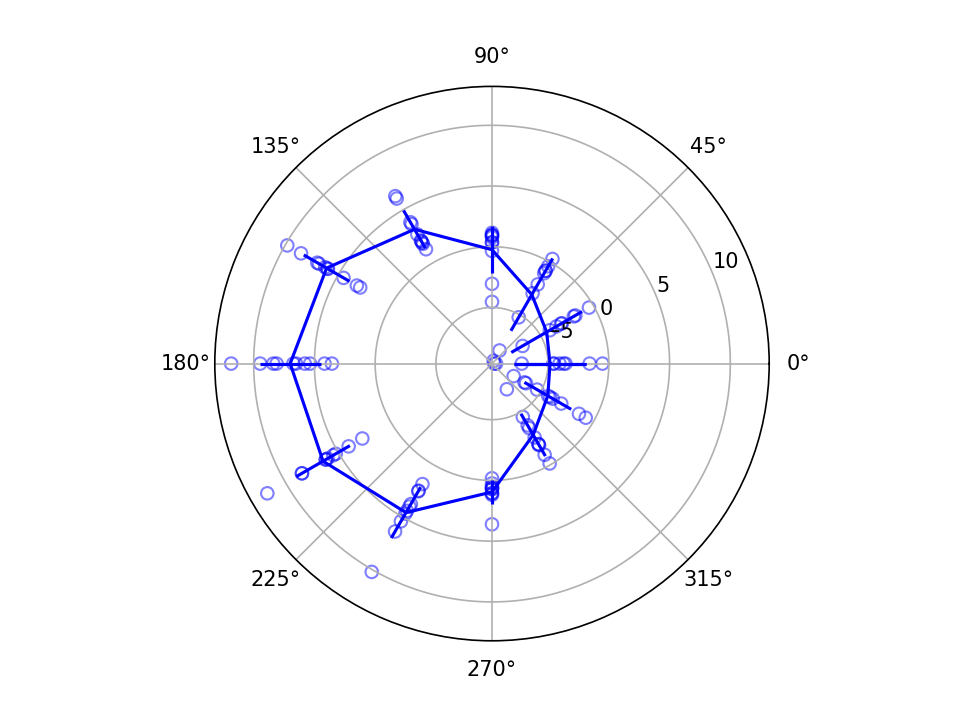

<IPython.core.display.Javascript object>


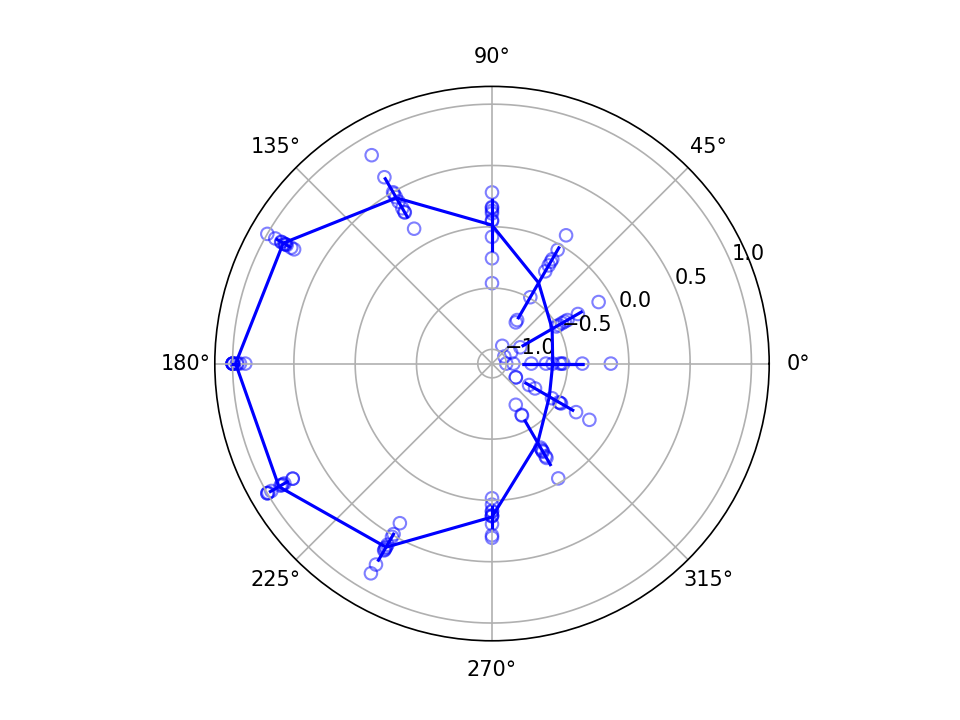

<IPython.core.display.Javascript object>


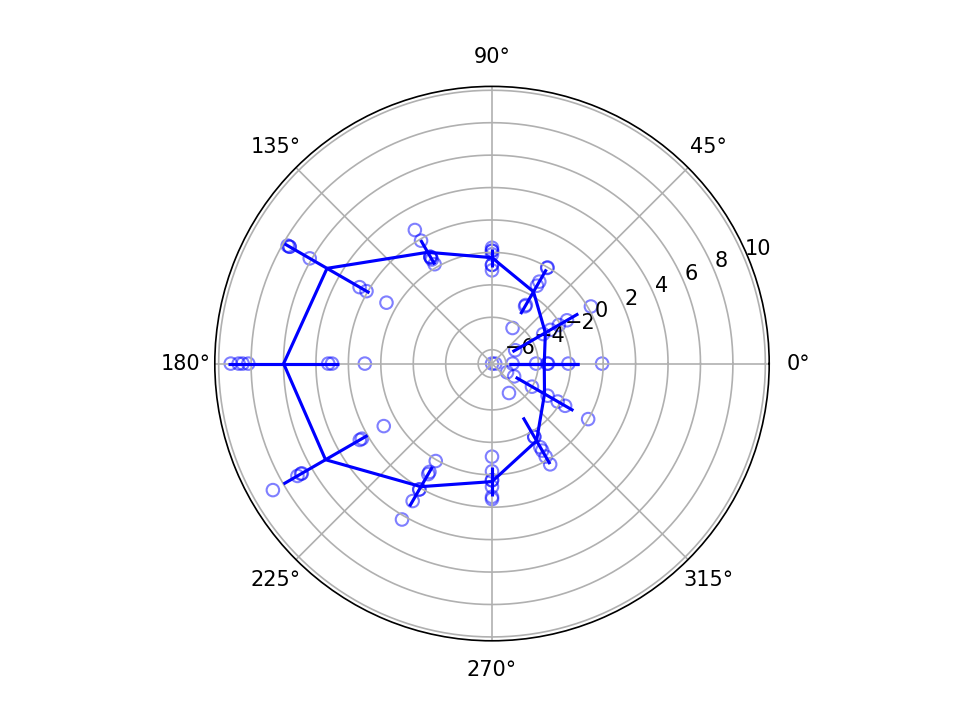

<IPython.core.display.Javascript object>


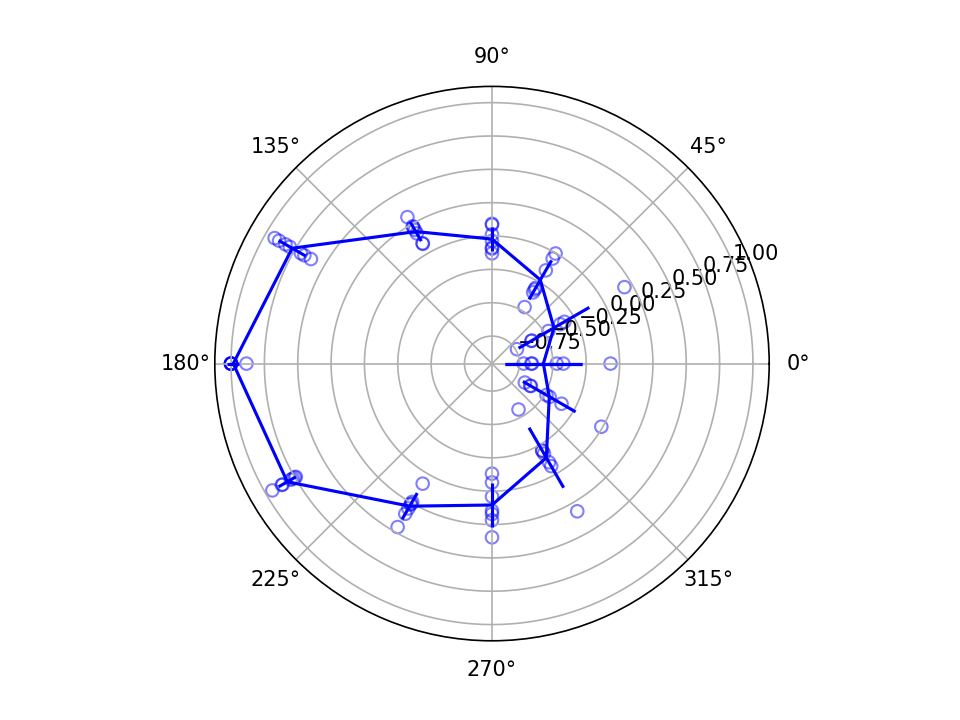

<IPython.core.display.Javascript object>


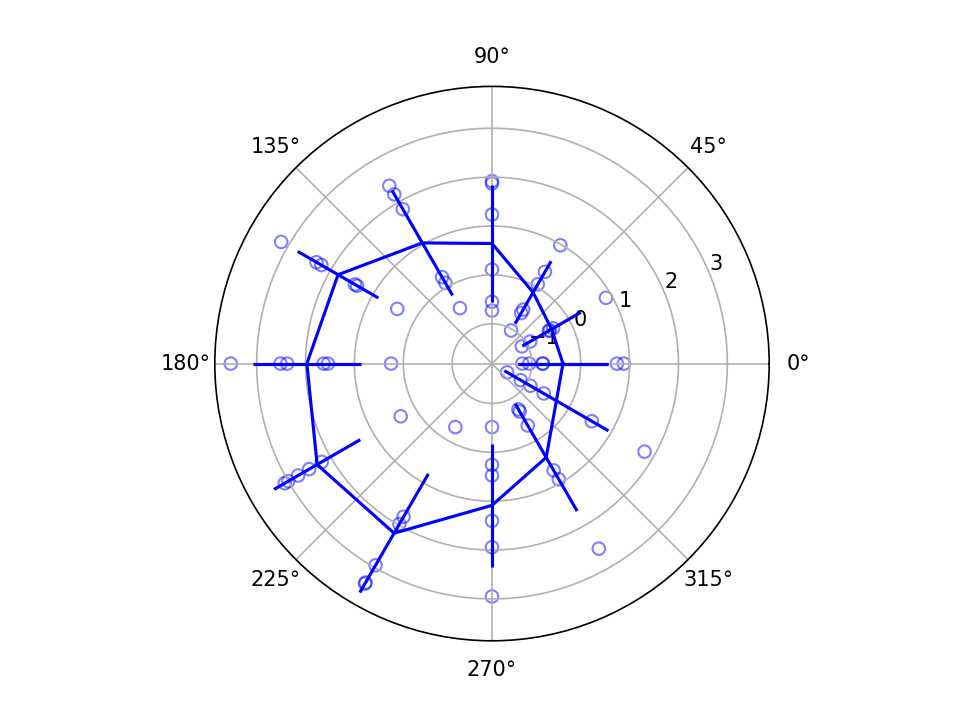

<IPython.core.display.Javascript object>


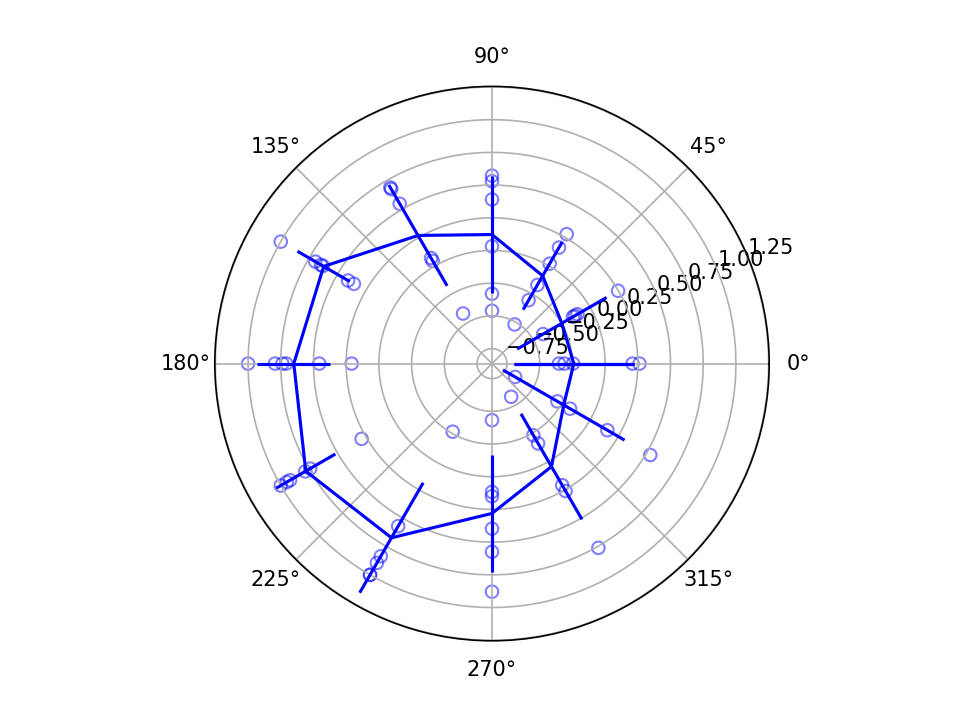

<IPython.core.display.Javascript object>


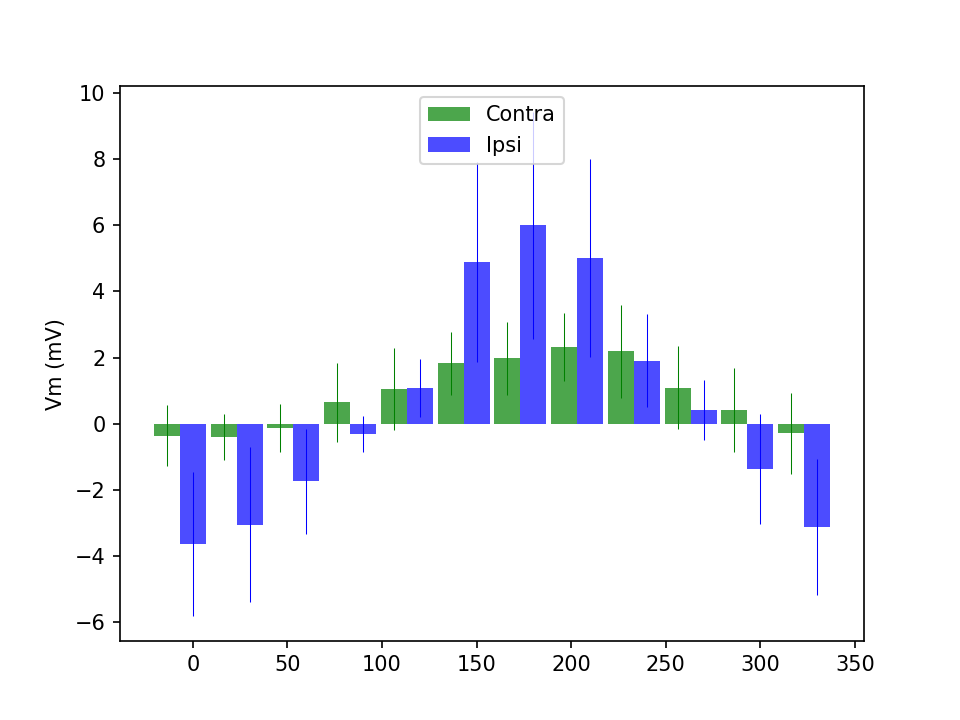

<IPython.core.display.Javascript object>


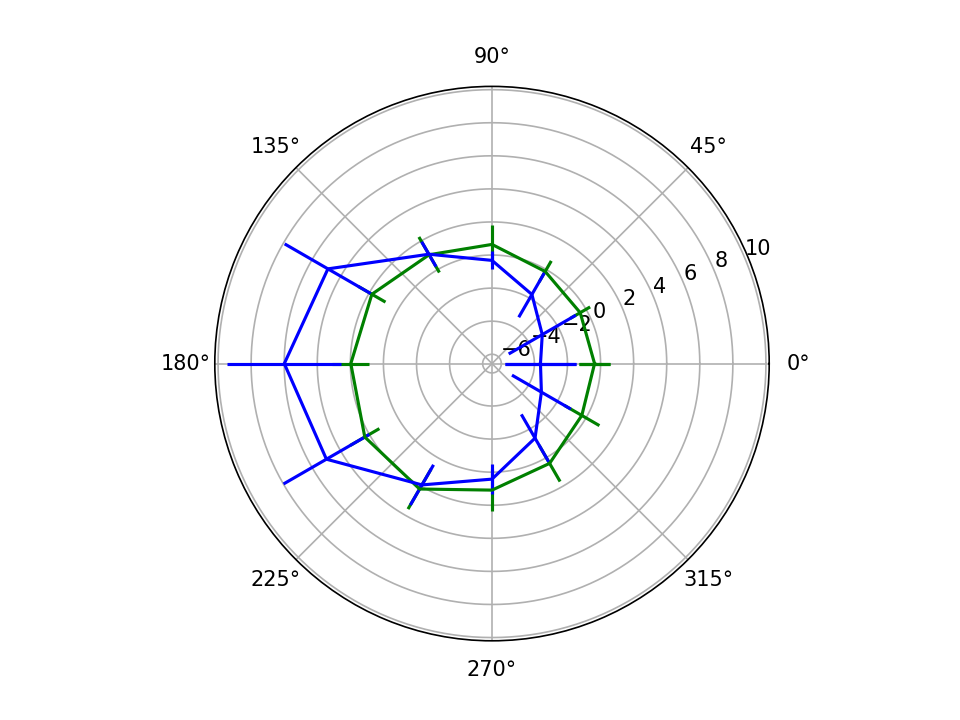

<IPython.core.display.Javascript object>


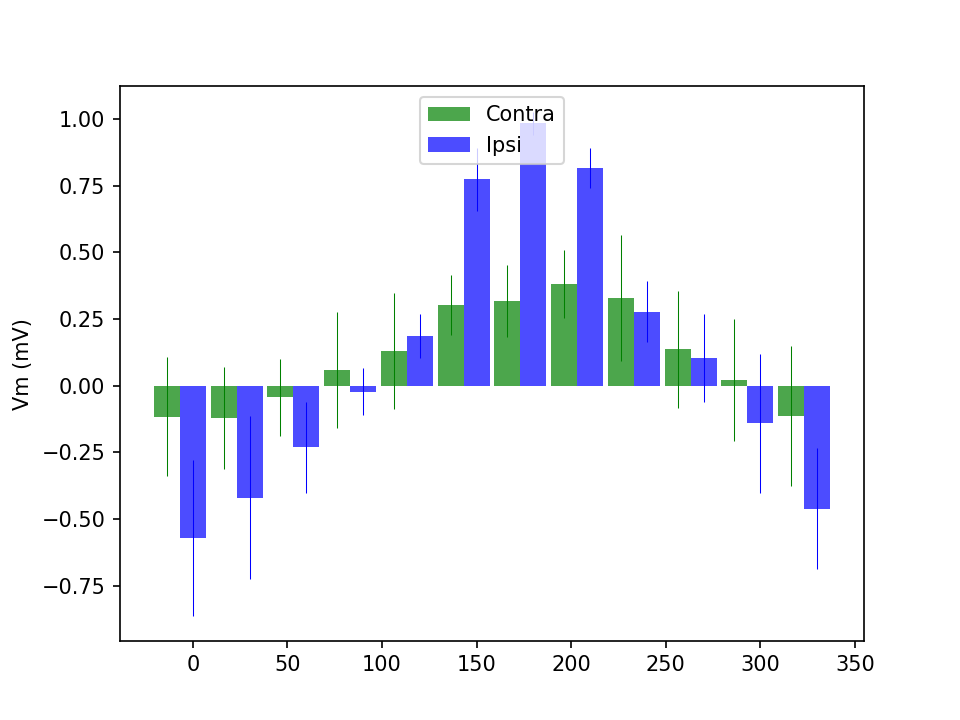

<IPython.core.display.Javascript object>


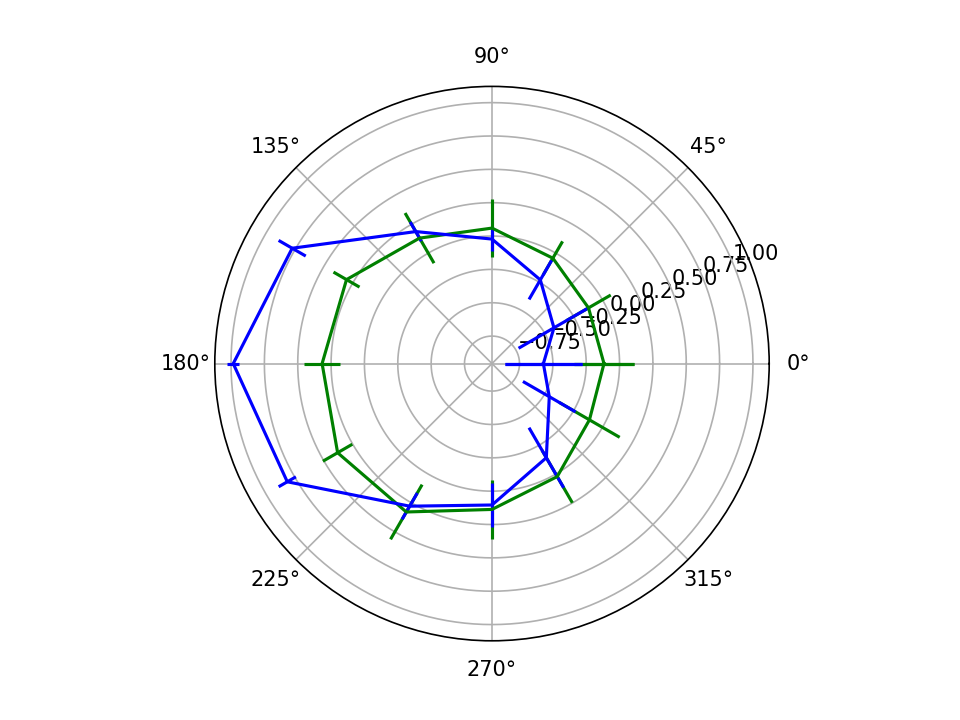

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os, errno
import pandas as pd
from scipy.stats import ttest_ind_from_stats
import scipy.signal as signal
from scipy import stats
from utils_LR_PvN_PDND import *

%matplotlib nbagg

celltype = 'HS'
csvroot = "C:/Users/Huayi/Google Drive/Desplan Lab/FuncExpt/Ephys/data/"
pageName = 'Set1dupe'

LRfull(celltype, csvroot, pageName)
#LR(celltype, csvroot, pageName) 

<IPython.core.display.Javascript object>


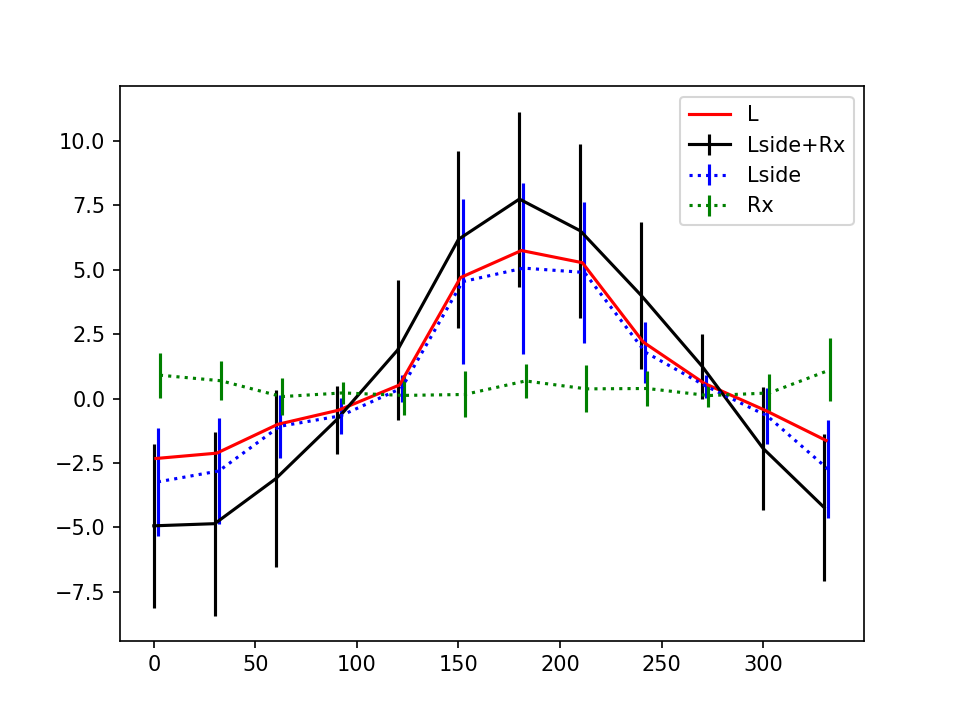

<IPython.core.display.Javascript object>


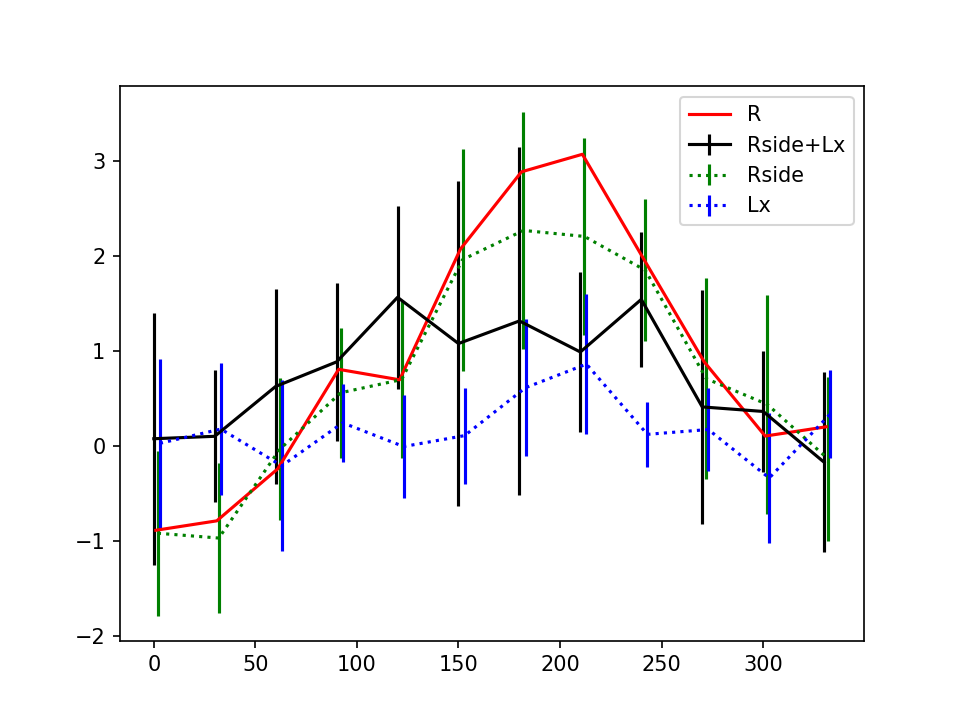

In [20]:
## Compare LR when no eye is painted, with when one eye is painted. 
## Goals: 
##   1. understand what one eye can see across the midline (Rx & Lx)
##     --> weak Rx, reasonable Lx. 
##   2. any nonlinearity. i.e. L !=  Lside + Rx or R != Rside + Lx
##     --> conclusion 06/19/2019: too noisy to tell. 

# For both eye: L =  Lside + Rx. R = Rside + Lx  
# For L eye: L = Lside. R = Lx.
# For R eye: L = Rx. R = Rside

stimulus = 'Sq_LR_12dir_lambda30_1Hz_bgstill'

MeanVdf = pd.read_csv(csvroot + 'analysis/'+stimulus+'/HS/MeanVdf.csv')
StdVdf = pd.read_csv(csvroot + 'analysis/'+stimulus+'/HS/StdVdf.csv')
stim_dir  = np.around((MeanVdf['Angles'].values).astype('float'),decimals=1)
Mov = MeanVdf['Vmovmean'].values; Movyerr = StdVdf['Vmovmean'].values 

MeanVdf = pd.read_csv(csvroot + 'analysis/'+stimulus+'/HS_L/MeanVdf.csv')
StdVdf = pd.read_csv(csvroot + 'analysis/'+stimulus+'/HS_L/StdVdf.csv')
MovL = MeanVdf['Vmovmean'].values; MovLyerr = StdVdf['Vmovmean'].values 

MeanVdf = pd.read_csv(csvroot + 'analysis/'+stimulus+'/HS_R/MeanVdf.csv')
StdVdf = pd.read_csv(csvroot + 'analysis/'+stimulus+'/HS_R/StdVdf.csv')
MovR = MeanVdf['Vmovmean'].values; MovRyerr = StdVdf['Vmovmean'].values 

L = Mov[12:]; R = Mov[:12]
Lside = MovL[12:]; Lx = MovL[:12]; Rside = MovR[:12]; Rx = MovR[12:]; 

plt.figure()
plt.errorbar(stim_dir[:12],L,yerr =Movyerr[12:], c='k'); plt.plot(stim_dir[:12]+1,Lside + Rx,'r')
plt.errorbar(stim_dir[:12]+2,Lside, yerr = MovLyerr[12:], c='b',ls  =':'); plt.errorbar(stim_dir[:12]+3,Rx,yerr = MovRyerr[12:], c='g',ls  =':')
plt.legend(['L','Lside+Rx','Lside','Rx'])

plt.figure()
plt.errorbar(stim_dir[:12],R,yerr = Movyerr[:12],c='k'); plt.plot(stim_dir[:12]+1,Rside + Lx,'r')
plt.errorbar(stim_dir[:12]+2,Rside, yerr = MovRyerr[:12], c='g',ls  =':'); plt.errorbar(stim_dir[:12]+3,Lx,yerr = MovLyerr[:12],c='b',ls  =':')
plt.legend(['R','Rside+Lx','Rside','Lx'])

In [3]:
# to check the file
csvpath = csvroot+'%s/%s.xlsx' %(celltype,celltype)
xls = pd.ExcelFile(csvpath)
df = pd.read_excel(xls, pageName)
df = df.copy()
df

,cells,Sine_12dir_lambda30_1Hz,Sq_LR_12dir_lambda30_1Hz_bgstill,Sine_PDND_lambda30_zHz,flashOnOff_mHz_grey,flashOffOn_mHz_grey,Sine_PvN_lambda30_zHz_bgstill,Edges_light_vel_grey,Edges_dark_vel_grey,Edges_light_vel_vert_grey,Edges_dark_vel_vert_grey,Sine_PvN_lambda30_zHz_bgstill.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,022719fly1,5.0,11.0,8.0,9.0,10.0,13.0,15.0,16.0,18.0,17.0,NaN
2,030719fly1,5.0,7.0,15.0,10.0,9.0,17.0,20.0,21.0,25.0,24.0,NaN
3,031519fly1,15.0,14.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,031819fly1,4.0,6.0,9.0,10.0,11.0,NaN,12.0,13.0,14.0,15.0,NaN
5,032019fly2,4.0,6.0,7.0,10.0,11.0,18.0,12.0,13.0,17.0,16.0,NaN
6,032619fly1,4.0,6.0,NaN,10.0,11.0,18.0,12.0,13.0,17.0,16.0,NaN
7,043019fly1,4.0,5.0,6.0,8.0,9.0,NaN,11.0,10.0,14.0,13.0,NaN
8,043019fly1cell2,5.0,6.0,7.0,9.0,10.0,NaN,12.0,11.0,16.0,15.0,NaN
9,050219fly1,5.0,6.0,10.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN


In [2]:
# run this code if want to see things individually. 

from utils_LR_PvN_PDND import *

if celltype[:2] == 'HS':
    spiking = 0
else:
    spiking = 1

stimulus = 'Sine_12dir_lambda30_1Hz'
if spiking: 
    Meandf,celldf,MeanVdf,cellVdf,Meannormdf,cellnormdf,MeanVnormdf,cellVnormdf,Stddf,StdVdf,Stdnormdf,StdVnormdf =  Mergecells(df,csvroot,stimulus,celltype,spiking)
else:
    MeanVdf,cellVdf,MeanVnormdf,cellVnormdf,StdVdf,StdVnormdf = Mergecells(df,csvroot,stimulus,celltype,spiking)
    
# simple 12 dir of normed values
plt12dir(spiking,csvroot,stimulus,celltype,0); plt12dir(spiking,csvroot,stimulus,celltype,1)
